In [21]:
testStat = 'latency_5m_single_transactions'
#testStat = 'latency_5m_single_transactions.transactions_LOCAL_RPC'


# testalgo = 'hbbft'
testalgo1 = 'hbbft'
testrun1 = 'final'
testname1 = 'latency1'

testalgo2 = 'aura'
testrun2 = 'final'
testname2 = testname1  # most of the time we wan't to compare the same tests against each other.



In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We use larger plot areas, adjust to your needs.

plt.rcParams["figure.figsize"] = (25, 15)

import seaborn as sns
sns.set(style="darkgrid")


In [23]:

def addCalcedColumns(df):
    df['durationSendToConfirmation'] = df['timeReceipt'] - df['timeSend']

filepath1 = 'data/' + testalgo1 + '/' + testrun1 + '/' + testname1 +  '/' + testStat + '.transactions.csv'
filepath2 = 'data/' + testalgo2 + '/' + testrun2 + '/' + testname2 +  '/' + testStat + '.transactions.csv'

df1 = pd.read_csv(filepath1)
df2 = pd.read_csv(filepath2)

addCalcedColumns(df1)
addCalcedColumns(df2)

df1.head()


,internalTxID,transactionHash,blockNumber,timeSend,timeReceipt,timeConfirmed,durationSendToConfirmation
0,1,0xdd0eceecef9aa124e7fe047e10f95e574538438d3f54...,12299,1585947544413,1585947544837,1585947544836,424
1,2,0x270b6ed3247bd465a2d0b080937d07bf409eeb4aac76...,12300,1585947553314,1585947553710,1585947553709,396
2,3,0x396f2be57d596e88f51293f9d1a00bc74977b1b50207...,12301,1585947555985,1585947556481,1585947556481,496
3,4,0xcc23e7e34e1e5c42697b45f17bb09bd21e944521947a...,12302,1585947562045,1585947562434,1585947562434,389
4,5,0xe61dd822e596156ada07483b74b499bc04f7b42e01a4...,12303,1585947567137,1585947567905,1585947567905,768


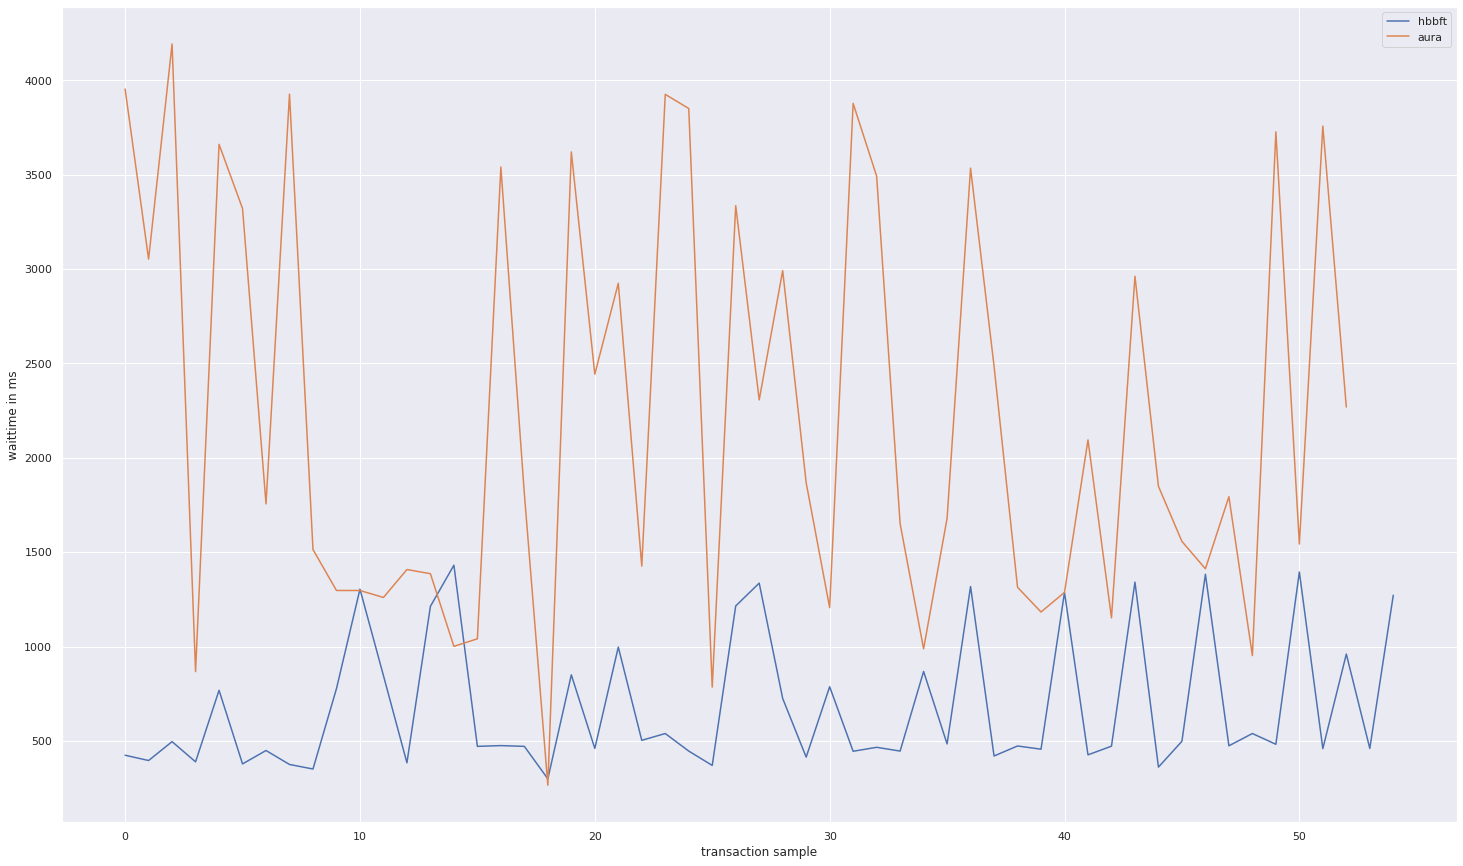

In [24]:
plot = plt.plot(df1.durationSendToConfirmation, label=testalgo1)
plot = plt.plot(df2.durationSendToConfirmation, label=testalgo2)

plt.xlabel('transaction sample')
plt.ylabel('waittime in ms')

plt.legend()


    
#plot = plt.plot(dfAura.durationSendToConfirmation)

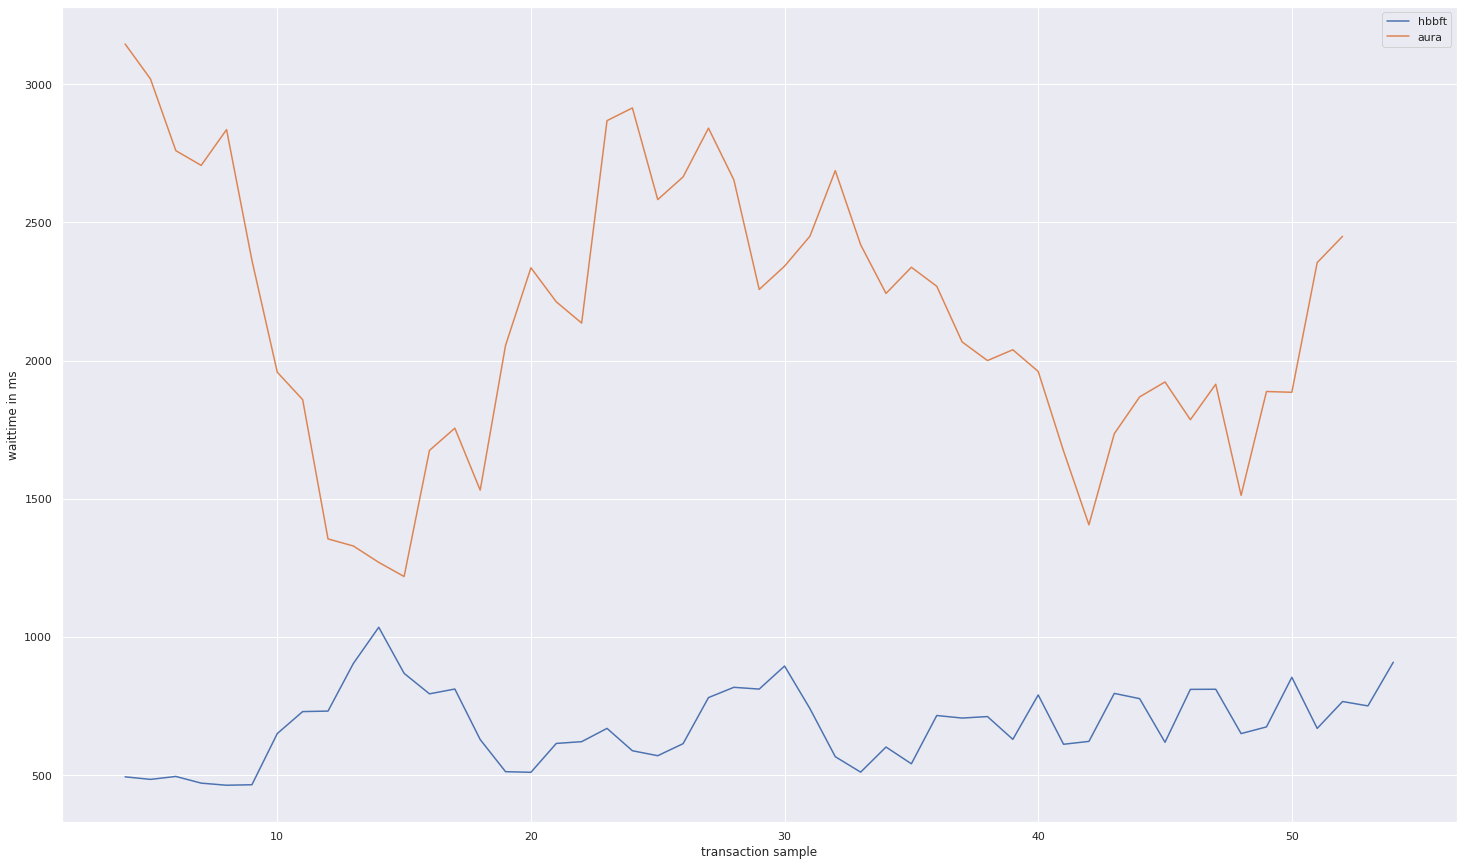

In [25]:
plot = plt.plot(df1.durationSendToConfirmation.rolling(window=5).mean(),  label=testalgo1)
plot = plt.plot(df2.durationSendToConfirmation.rolling(window=5).mean(),  label=testalgo2)
#plot = plt.plot(dfAura.durationSendToConfirmation.rolling(window=5).mean())


plt.xlabel('transaction sample')
plt.ylabel('waittime in ms')

plt.legend()

